In [78]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np 

# Define a function to integrate 

In [79]:
def dfdx(x,f): 
    return x**2 + x

# Define its integral 

In [80]:
def f_int(x,C): 
    return (x**3)/3. + 0.5*x**2 + C

# Define the 2nd order RK method 

In [81]:
def rk2_core(x_i, f_i, h, g): 
    
    #advance f by a step h 
    
    #half step 
    x_ipoh = x_i + 0.5*h
    
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    #full step 
    f_ipo = f_i + h*g(x_ipoh, f_ipoh)
    
    return f_ipo

# Define a wrapper routine for RK2

In [82]:
def rk2(dfdx, a, b, f_a, N): 
    
    #dfdx is the derivative wrt x 
    #a is the lower bound 
    #b is the upper bound 
    #f_a is the boundary condition at a 
    #N is the number of steps 
    
    #define our steps 
    x = np.linspace(a,b,N)
    
    #a single step size 
    h = x[1] -x[0]
    
    #an array to hold f 
    f = np.zeros(N, dtype= float)
    
    f[0] = f_a #value of f at a 
    
    #evolve f along x 
    for i in range(1, N): 
        f[i] = rk2_core(x[i-1],f[i-1], h, dfdx)
        
    return x,f 

# Define the 4th order RK method 

In [83]:
def rk4_core(x_i, f_i, h, g): 
    
    #define x at 1/2 step 
    x_ipoh = x_i + 0.5*h 
    
    
    #define x at 1 stop 
    x_ipo = x_i + h 
    
    #advance f by a step h 
    
    k_1 = h*g(x_i, f_i)
    
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 + 2*k_3 + k_4)/6.
    
    return f_ipo 

# Define a wrapper for RK4 

In [84]:
def rk4(dfdx, a, b, f_a, N): 
    
    #dfdx is the derivative wrt x 
    #a is the lower bound 
    #b is the upper bound 
    #f_a is the boundary condition at a 
    #N is the number of steps 
    
    #define our steps 
    x = np.linspace(a,b,N)
    
    #a single step size 
    h = x[1] -x[0]
    
    #an array to hold f 
    f = np.zeros(N, dtype= float)
    
    f[0] = f_a #value of f at a 
    
    #evolve f along x 
    for i in range(1, N): 
        f[i] = rk4_core(x[i-1],f[i-1], h, dfdx)
        
    return x,f 

# Preform the integration 

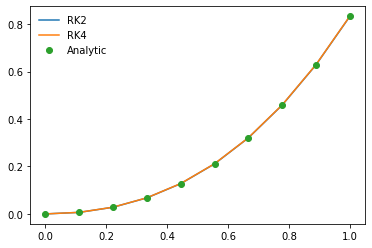

In [85]:
a = 0.0
b = 1.0
f_a = 0.0 
N = 10 
x_2, f_2 = rk2(dfdx, a, b, f_a, N)

x_4, f_4 = rk4(dfdx, a, b, f_a, N)

x = x_2.copy()

plt.plot(x_2, f_2, label ='RK2')

plt.plot(x_4, f_4, label = 'RK4')

plt.plot(x,f_int(x,f_a), 'o', label = 'Analytic')

plt.legend(frameon = False)